In [ ]:
name='p3'

In [ ]:
!pip install -q duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 10.5 MB/s eta 0:00:00


In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import * 

In [ ]:
def search_images(term,max_images=30):
    print(f"Searching for {term}")
    return L(ddg_images(term,max_results=max_images)).itemgot('image')

In [ ]:
urls=search_images('bird photo',max_images=1)
urls[0]

Searching for bird photo


'https://img.fotocommunity.com/birds-from-mauritius-a5541707-4f66-488b-9a8c-786a393a659a.jpg?height=1080'

In [ ]:
from fastdownload import download_url

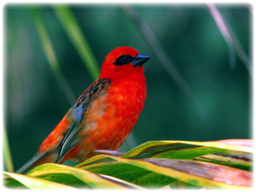

In [ ]:
dest='bird.jpg'

download_url(url=urls[0],dest=dest,show_progress=False)

from fastai.vision.all import * 
im=Image.open('bird.jpg')
im.to_thumb(256,256)


Searching for forest photo


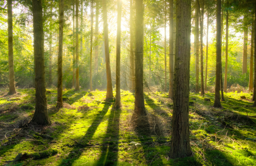

In [ ]:
download_url(search_images('forest photo',max_images=1)[0],dest='forest.jpg',show_progress=False)
im=Image.open('forest.jpg')
im.to_thumb(256,256)

In [ ]:
searches='bird','forest'
path=Path('bird_or_not')

from time import sleep 

for o in searches:
    dest=(path/o)
    dest.mkdir(exist_ok=True,parents=True)
    download_images(dest,urls=search_images(f"{o} photo"))
    sleep(10)
    download_images(dest,urls=search_images(f"{o} sun photo"))
    sleep(10)
    download_images(dest,urls=search_images(f"{o} shade photo")) 
    sleep(10)
    resize_image(path/o,max_size=400,dest=dest)

Searching for bird photo
Searching for bird sun photo
Searching for bird shade photo
Searching for forest photo
Searching for forest sun photo
Searching for forest shade photo


In [ ]:
failed=verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1

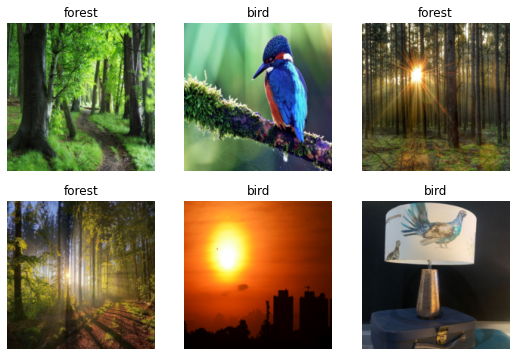

In [ ]:
dls=DataBlock(
    blocks=[ImageBlock,CategoryBlock],
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    item_tfms=[Resize(196,method='squish')]
).dataloaders(path,bs=32)

dls.show_batch(max_n=6)

In [ ]:
learn=vision_learner(dls,resnet18,metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.975193,0.539371,0.176471,00:29


epoch,train_loss,valid_loss,error_rate,time
0,0.273490,0.057458,0.000000,00:22
1,0.149950,0.040716,0.029412,00:28
2,0.111586,0.060213,0.029412,00:29


In [ ]:
is_bird,_,probs=learn.predict(PILImage.create('bird.jpg'))
print(f"Is it a bird: {is_bird}")
print(f"Porb:{probs:.4f}")

AttributeError: ignored